<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# MLP for MNIST
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

train: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


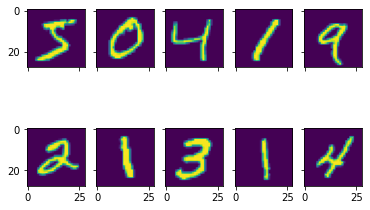

In [12]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()  #60000 samples for training, 10000 samples for testing

print('train:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

# visualize some
fig, ax = plt.subplots(2,5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_train[i,:])
plt.show()

# prepare the data for training
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
# classification model
input_shape=x_train.shape[1]
num_classes = y_train.shape[1]
model = Sequential()
model.add(Dense(350, activation='relu', input_shape=(28*28,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=512, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)

print(f'Test results \n - Loss    : {test_results[0]: 0.3f}  \n - Accuracy: {test_results[1]: 0.3f}')

Epoch 1/100
94/94 [==============================] - 2s 17ms/step - loss: 0.4920 - accuracy: 0.8684 - val_loss: 0.2135 - val_accuracy: 0.9394
Epoch 2/100
94/94 [==============================] - 1s 15ms/step - loss: 0.1831 - accuracy: 0.9485 - val_loss: 0.1529 - val_accuracy: 0.9571
Epoch 3/100
94/94 [==============================] - 1s 15ms/step - loss: 0.1280 - accuracy: 0.9637 - val_loss: 0.1269 - val_accuracy: 0.9629
Epoch 4/100
94/94 [==============================] - 1s 16ms/step - loss: 0.0957 - accuracy: 0.9729 - val_loss: 0.1093 - val_accuracy: 0.9678
Epoch 5/100
94/94 [==============================] - 1s 15ms/step - loss: 0.0738 - accuracy: 0.9789 - val_loss: 0.0978 - val_accuracy: 0.9702
Epoch 6/100
94/94 [==============================] - 1s 16ms/step - loss: 0.0589 - accuracy: 0.9839 - val_loss: 0.0931 - val_accuracy: 0.9711
Epoch 7/100
94/94 [==============================] - 1s 16ms/step - loss: 0.0480 - accuracy: 0.9867 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 

Confusion Matrix
[[ 973    1    1    1    0    0    1    1    2    0]
 [   0 1126    3    2    0    1    2    0    1    0]
 [   4    2 1010    3    1    0    3    4    3    2]
 [   0    0    3  991    0    3    0    3    4    6]
 [   0    0    3    1  961    0    5    2    1    9]
 [   2    0    0    8    1  870    4    1    3    3]
 [   2    3    0    1    3    4  942    0    3    0]
 [   1    4    7    2    0    0    0 1008    1    5]
 [   2    0    2    7    1    3    1    2  954    2]
 [   3    3    0    4    7    2    1    4    2  983]]


<Figure size 432x288 with 0 Axes>

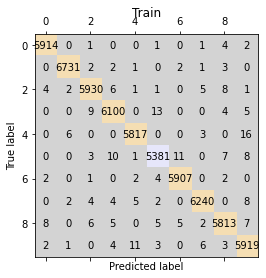

<Figure size 432x288 with 0 Axes>

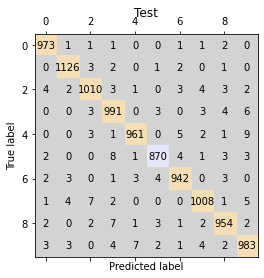

In [40]:
y_pred = model.predict(x_test)
print('Confusion Matrix')
print(confusion_matrix(y_test.argmax(1), y_pred.argmax(1)))


cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(y_train.argmax(1), model.predict(x_train).argmax(1), title='Train')
cm(y_test.argmax(1), model.predict(x_test).argmax(1), title='Test')